## Tesseract OCR Experiments

Exploring Tesseract OCR capabilities for document processing.

**Note** pytesseract python package is just a wrapper for tesseract ocr engine. I need to make sure i have tesseract installed on my system for this to work. For ubuntu:
    
```bash
    sudo apt-get install tesseract-ocr-all    
```
or language specific:
```bash
    sudo apt-get install tesseract-ocr-[lang_code]
```

In [1]:
import os
from pathlib import Path


# To find the project root directory check for 'pyproject.toml' or any other root file.
def setup_path(root_file: str = "pyproject.toml") -> None:
    """Set up the working directory to the project root."""
    current_path = Path.cwd()
    if (current_path / root_file).exists():
        print(f"Already at repository root: {current_path}")
        return
    while current_path := current_path.parent:
        print(f"Checking path: {current_path}")
        if (current_path / root_file).exists():
            os.chdir(current_path)
            print(f"Changed working directory to: {os.getcwd()}")
            break


print("Setting up project path...")
print("Current working directory:", os.getcwd())
setup_path()

Setting up project path...
Current working directory: /home/talha/Desktop/Work repositories/Document_Processing/experiments
Checking path: /home/talha/Desktop/Work repositories/Document_Processing
Changed working directory to: /home/talha/Desktop/Work repositories/Document_Processing


In [2]:
import pytesseract
from PIL import Image

from data.helper import print_document

print("Tesseract version:", pytesseract.get_tesseract_version())
print("Total Tesseract Languages Supported:", len(pytesseract.get_languages()))
print("Tesseract Languages:", pytesseract.get_languages())

Tesseract version: 4.1.1
Total Tesseract Languages Supported: 124
Tesseract Languages: ['afr', 'amh', 'ara', 'asm', 'aze', 'aze_cyrl', 'bel', 'ben', 'bod', 'bos', 'bre', 'bul', 'cat', 'ceb', 'ces', 'chi_sim', 'chi_sim_vert', 'chi_tra', 'chi_tra_vert', 'chr', 'cos', 'cym', 'dan', 'deu', 'div', 'dzo', 'ell', 'eng', 'enm', 'epo', 'est', 'eus', 'fao', 'fas', 'fil', 'fin', 'fra', 'frk', 'frm', 'fry', 'gla', 'gle', 'glg', 'grc', 'guj', 'hat', 'heb', 'hin', 'hrv', 'hun', 'hye', 'iku', 'ind', 'isl', 'ita', 'ita_old', 'jav', 'jpn', 'jpn_vert', 'kan', 'kat', 'kat_old', 'kaz', 'khm', 'kir', 'kmr', 'kor', 'kor_vert', 'lao', 'lat', 'lav', 'lit', 'ltz', 'mal', 'mar', 'mkd', 'mlt', 'mon', 'mri', 'msa', 'mya', 'nep', 'nld', 'nor', 'oci', 'ori', 'osd', 'pan', 'pol', 'por', 'pus', 'que', 'ron', 'rus', 'san', 'sin', 'slk', 'slv', 'snd', 'spa', 'spa_old', 'sqi', 'srp', 'srp_latn', 'sun', 'swa', 'swe', 'syr', 'tam', 'tat', 'tel', 'tgk', 'tha', 'tir', 'ton', 'tur', 'uig', 'ukr', 'urd', 'uzb', 'uzb_cyrl', 'v

Displaying image: invoice.png
Original size: (829, 444)
Resized to: (800, 428)


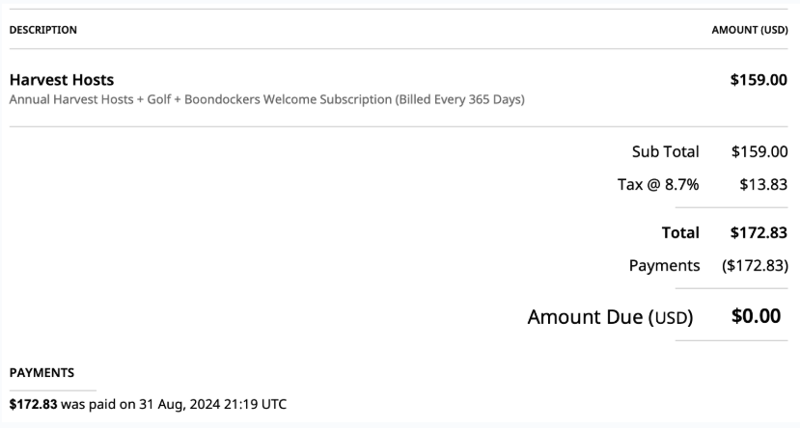

DESCRIPTION AMOUNT (USD)

Harvest Hosts $159.00
Annual Harvest Hosts + Golf + Boondockers Welcome Subscription (Billed Every 365 Days)

Sub Total $159.00
Tax @ 8.7% $13.83

Total $172.83
Payments ($172.83)

Amount Due (USD) $0.00

PAYMENTS

$172.83 was paid on 31 Aug, 2024 21:19 UTC



In [3]:
# Easy example # 1
def tesseract_ocr(image_path: str) -> None:
    """Extract text from an image using Tesseract OCR."""
    try:
        ocr_result = pytesseract.image_to_string(Image.open(image_path))
        print(ocr_result)
    except Exception as e:
        print(f"Error reading image: {e}")


easy_image_path = "data/easy_examples/invoice.png"
print_document(easy_image_path)
tesseract_ocr(easy_image_path)

In [5]:
# Easy example # 2
print("\n" + "=" * 50 + "\n")
print("Processing second easy example...\n")
easy_image_path_2 = "data/easy_examples/bank_statement.png"

print_document(easy_image_path_2)
tesseract_ocr(easy_image_path_2)



Processing second easy example...

Displaying image: bank_statement.png
Original size: (1525, 2360)
Resized to: (516, 800)


[NB | Northbank Financial

ACCOUNT SUMMARY

Name Jordan Example Beginning balance
Address 1243 Maple Ave Apt 5B - Brooklyn, NY 11211__Total deposits/credits
Account Checking ++++ 2841 Total withdrawals/debits
Routing 021000021 —_Ending balance

Date Description Category

Aug01 Card Purchase - Instacart Everyday Spending

Includes taxes and fees
‘Aug01 Monthly Service Fee Fees

Pay cycle: 08/15/2025

‘Aug01 POS Purchase - Home Depot Everyday Spending

Aug02 Card Purchase - Steam Games Subscriptions
Project reimbursement

‘Aug 02 Reimbursement - Expense Income/Transfers

Aug03 Card Purchase - Panera Bread Everyday Spending

‘Aug 07 —_ Deposit - Mobile Check Income/Transfers

Trip ID 142B-3C4D
‘Aug07 POS Purchase - PetSmart Everyday Spending
Aug08 ACH Debit - Phone Bill Utilities

Includes taxes and fees
Aug08 Check #1054 Everyday Spending

Tracking: 1Z 999 AA1 01 2345 6784

Aug08 POS Purchase - IKEA Everyday Spending

Aug09 Card Purchase - Instacart Everyday Spending

Aug 11 Card Purchas